STOCK PRICE PREDICTION OF GOOGLE USING LSTM
=======================

In this project we will try to predict the stock price of Google using LSTM. Though the future stock price does not depend on the past, but we can observe some trend. We will try to predict the upward and downward trend that exist in Google stocks and this would be done using LSTM (a special case of RNN's). We are going to implement a robust LSTM with stacked layers. We are also going to add drop outs and regularizers to avoid overfitting.


We are going to train our LSTM on 5 years of Google stock price starting from 2012 to 2016. After the model is trained we will try to predict the trend for the first month i.e January of year 2017. Here we are not going to exactly predict the stock price but we are going to predict its trend.

The data for the training and testing is given here.

Lets us have a look at the stock price of Google from year 2012 to last month of 2016. The graph is shown below

![Google Stock Price](TrainStockPrices.png)

As we can see there is some upward trend in the stock prices although there are some downward trends in between.

We will start by loading the necessary packages of python required for our training


In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The dataset is loaded and the training set is being extracted from the dataset.


In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

There are two ways of Feature Scaling , one is data standardisation and the other is data normalisation. 
![Feature Scaling](fs.png)
It's a better choice to go for normalisation for our stock prices data.

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Now we will take previous 60 time steps of training_set_scaled and put in X_train and 1 output which would be next value of the time step taken for training.

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


The data is reshaped into 3d tensor as the LSTM/RNN requires the input to be of that shape. 

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


We are ready to build up a RNN/LSTM model

Let us import the necessary packages of keras 

In [6]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using Theano backend.


Let us initialise the sequential model.Since it is a continuous output problem we would rather go for regression rather than classification

In [7]:
# Initialising the RNN
regressor = Sequential()

We will now build up a LSTM model by adding up layers followed by dropout. The model is given below


In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


We will add the final layer which is the dense layer of LSTM . The number of units in this case will be 1 as we have just one output to predict

In [9]:
# Adding the output layer
regressor.add(Dense(units = 1))

We will finally compile and fit the dataset accordingly. We will use 'adam' optimiser as our preferred optimiser and loss as 'mean square error'

In [10]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s - loss: 0.0528     
Epoch 2/100
1198/1198 [==============================] - 4s - loss: 0.0061     
Epoch 3/100
1198/1198 [==============================] - 4s - loss: 0.0048     
Epoch 4/100
1198/1198 [==============================] - 4s - loss: 0.0051     
Epoch 5/100
1198/1198 [==============================] - 4s - loss: 0.0050     
Epoch 6/100
1198/1198 [==============================] - 4s - loss: 0.0051     
Epoch 7/100
1198/1198 [==============================] - 4s - loss: 0.0045     
Epoch 8/100
1198/1198 [==============================] - 4s - loss: 0.0044     
Epoch 9/100
1198/1198 [==============================] - 4s - loss: 0.0046     
Epoch 10/100
1198/1198 [==============================] - 4s - loss: 0.0044     
Epoch 11/100
1198/1198 [==============================] - 4s - loss: 0.0044     
Epoch 12/100
1198/1198 [==============================] - 4s - loss: 0.0037     
Epoch 13/100
1198/1198 [=============

After the model is trained , we will try to make the predictions on the test data set and visualise the results. But since the test dataset contains only 20 values and in order to fit into the model for predictions we need the previous 60 time stamps values. Thus we concatenate training_set and testing_set and then try to predict accordingly.We need to have the right format for the input.


In [11]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

It's time to visualise the results and check the robustness of the model.

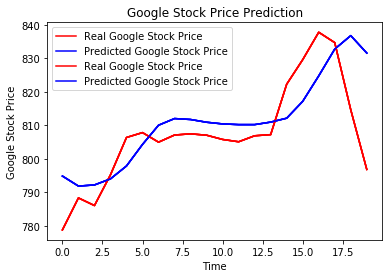

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

Observations:

1. Our model performs well and follows the trend overall 
2. The model cannot identify fast non linear changes in the stock prices.
3. The RNN/LSTM model reacts well to smooth changes

For our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

In [17]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

We then divide rmse by the range of Google Stock Prices which is around 800 to get a relative error, as opposed to an absolute error. It is more relevant since for example if you get an RMSE of 50, then this error would be very big if the stock price values ranged around 100, but it would be very small if the stock price values ranged around 10000.


IMPROVING THE RNN/LSTM MODEL
================

Here are different ways to improve the RNN model:

1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.
2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).
3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.
4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.
5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. We could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.